In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
final_data = "Resources/final_data.csv"

# Import the data into a Pandas DataFrame
final_df = pd.read_csv(final_data)

final_df['Sick_death_rate(in 1000 people_wkly)'] *= 100
final_df['All_death_rate(in 1000 people_wkly)'] *= 100
final_df.head()

,Unnamed: 0,US State Name,State_x,State_x.1,Month_x,Avg_temp,Density (Pop./ mi2),Population,sick death,all death,Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64,65+,Sick_death_rate(in 1000 people_wkly),All_death_rate(in 1000 people_wkly),sick of all death,GDP per capita
0,0,Alabama,AL,Alabama,January,45.525000,95.0,4858979,93.255814,1081.883721,0.24,0.09,0.11,0.26,0.14,0.17,1.919247,22.265660,0.086198,"36,404"
1,1,Alaska,AK,Alaska,January,11.930000,1.0,738432,4.813953,82.255814,0.27,0.09,0.14,0.26,0.13,0.11,0.651916,11.139254,0.058524,"69,326"
2,2,Arizona,AZ,Arizona,January,45.960000,60.0,6828065,90.232558,1099.395349,0.25,0.09,0.12,0.25,0.12,0.17,1.321495,16.101126,0.082075,"38,340"
3,3,Arkansas,AR,Arkansas,January,40.433333,57.0,2978204,67.418605,660.209302,0.25,0.09,0.11,0.25,0.13,0.17,2.263734,22.168035,0.102117,"35,412"
4,4,California,CA,California,January,49.237500,251.0,39144818,612.139535,5480.674419,0.24,0.10,0.14,0.27,0.12,0.14,1.563782,14.001022,0.111691,"54,232"


In [3]:
x = final_df.groupby('State_x', as_index=False)['Sick_death_rate(in 1000 people_wkly)'].mean()
y = final_df.groupby('State_x', as_index=False)['All_death_rate(in 1000 people_wkly)'].mean()


sick_all_death = pd.merge(left = x, right = y, how = 'inner', on = 'State_x')
new = sick_all_death.rename(columns = {'Sick_death_rate(in 1000 people_wkly)': 'sick death', 'All_death_rate(in 1000 people_wkly)': 'all death'})

new.head()


,State_x,sick death,all death
0,AK,0.632382,10.634080
1,AL,1.285364,19.991257
2,AR,1.561805,19.765263
3,AZ,0.932867,14.705812
4,CA,1.061852,12.308259


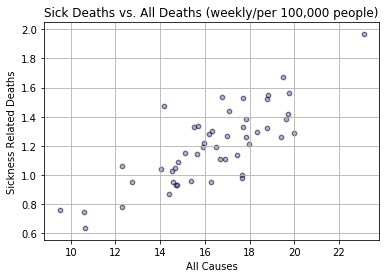

In [7]:
new.plot(kind = "scatter", x = 'all death', y = 'sick death', c = 'SlateBlue', alpha = 0.5, edgecolors = "black", linewidth = 1.25)

plt.xlabel('All Causes')
plt.ylabel('Sickness Related Deaths')
plt.title('Sick Deaths vs. All Deaths (weekly/per 100,000 people)')
plt.grid()
plt.savefig('Sick_vs_All_Deaths.png')
plt.show()

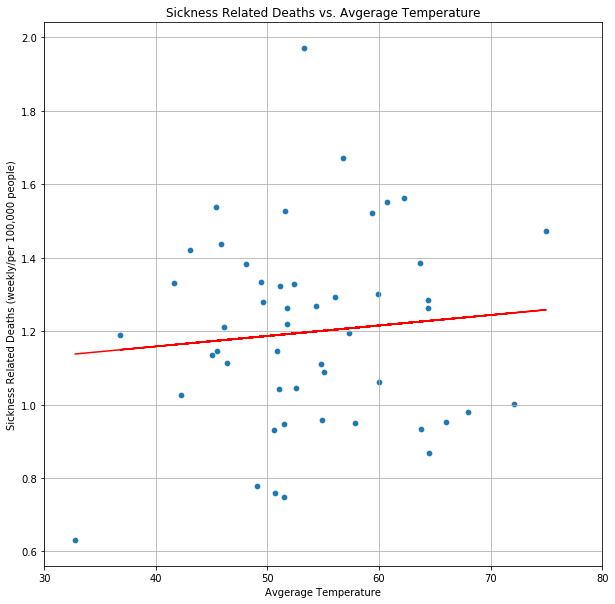

In [6]:
a = final_df.groupby('State_x', as_index=False)['Sick_death_rate(in 1000 people_wkly)'].mean()
b = final_df.groupby('State_x', as_index=False)['Avg_temp'].mean()

sick_temp_death = pd.merge(left = a, right = b, how = 'inner', on = 'State_x')
ab = sick_temp_death.rename(columns = {'Sick_death_rate(in 1000 people_wkly)': 'sick death'})

ab.plot(kind = "scatter", x = 'Avg_temp', y = 'sick death', figsize=(10,10), linewidth = 1.25)

plt.ylim()
plt.xlim(30,80)

plt.xlabel('Avgerage Temperature')
plt.ylabel('Sickness Related Deaths (weekly/per 100,000 people)')
plt.title('Sickness Related Deaths vs. Avgerage Temperature')
plt.grid()

z = np.polyfit(ab["Avg_temp"], ab["sick death"], 1)
p = np.poly1d(z)
plt.plot(ab["Avg_temp"],p(ab["Avg_temp"]),"red")
plt.savefig('Sick_Deaths_vs_Avgerage_Temperature.png')
plt.show()
